<a href="https://colab.research.google.com/github/VittorLeandro/ANALISE-DE-DADOS---ACIDENTES-PRF2024/blob/main/FUNDAMENTOS_DE_AN%C3%81LISE_EXPLORAT%C3%93RIA_DE_DADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from IPython.display import Markdown as md

md("""
# 📊 Projeto: Análise de Preços de Combustíveis - 2024.01

## 👨‍🎓 Autor: **VITOR LEANDRO** | RA: 2024121119
**Curso:** CST em Ciência de Dados

---

## Introdução

Este projeto tem como objetivo analisar os preços de combustíveis na região estudada, identificando padrões de variação por bandeira, faixas de preço e outliers.
Serão aplicadas técnicas de análise exploratória de dados (AED), visualizações gráficas e estatísticas descritivas para fornecer insights detalhados sobre o comportamento do mercado de combustíveis.

O relatório inclui:
- Medidas estatísticas por tipo de combustível
- Comparação entre bandeiras e CNPJs
- Identificação de outliers e análise de dispersão
- Gráficos ilustrativos para apoiar as conclusões

O estudo visa apoiar decisões informadas e demonstrar competências adquiridas no curso de Ciência de Dados.
""")



# 📊 Projeto: Análise de Preços de Combustíveis - 2024.01

## 👨‍🎓 Autor: **VITOR LEANDRO** | RA: 2024121119  
**Curso:** CST em Ciência de Dados

---

## Introdução

Este projeto tem como objetivo analisar os preços de combustíveis na região estudada, identificando padrões de variação por bandeira, faixas de preço e outliers.  
Serão aplicadas técnicas de análise exploratória de dados (AED), visualizações gráficas e estatísticas descritivas para fornecer insights detalhados sobre o comportamento do mercado de combustíveis.

O relatório inclui:  
- Medidas estatísticas por tipo de combustível  
- Comparação entre bandeiras e CNPJs  
- Identificação de outliers e análise de dispersão  
- Gráficos ilustrativos para apoiar as conclusões

O estudo visa apoiar decisões informadas e demonstrar competências adquiridas no curso de Ciência de Dados.


In [5]:
#Parte A — Carregamento, identificação de colunas vazias e tipos de variáveis

import pandas as pd
import numpy as np

path = "/mnt/data/Preços semestrais - AUTOMOTIVOS_2024.01_reduzido.csv"
# arquivo usa ';' como separador e tem BOM
df = pd.read_csv(path, encoding='utf-8-sig', sep=';', engine='python')

# nomes - limpeza leve
df = df.rename(columns=lambda x: x.strip())

# colunas completamente vazias
all_null_cols = [c for c in df.columns if df[c].isna().all()]
print("Colunas todas NaN:", all_null_cols)

# contagem de nulos por coluna
print(df.isna().sum().sort_values(ascending=False).head(30))

# tipos (dtypes) e separação numéricas / categóricas
print(df.dtypes)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols  = df.select_dtypes(include=['object']).columns.tolist()
print("Numéricas:", numeric_cols)
print("Objeto:", object_cols)


Colunas todas NaN: ['Valor de Compra']
Valor de Compra      49998
Complemento          38295
Bairro                  73
Numero Rua              11
Revenda                  0
Municipio                0
Regiao - Sigla           0
Estado - Sigla           0
CNPJ da Revenda          0
Nome da Rua              0
Produto                  0
Cep                      0
Data da Coleta           0
Valor de Venda           0
Unidade de Medida        0
Bandeira                 0
dtype: int64
Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object
Numéricas: ['Valor de Compra']
Objeto:

In [6]:
#Parte B — Medidas descritivas do preço por tipo de combustível

# Nome das colunas principais (ajuste caso o CSV tenha nomes diferentes)
price_col = 'Valor de Venda'
fuel_col  = 'Produto'

# normalizar / converter preço para número (remove "R$", troca vírgula por ponto)
df[price_col] = df[price_col].astype(str).str.replace('R$','').str.replace(' ','').str.replace(',','.', regex=False)
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

# agrupar por tipo de combustível e descritivas
desc_by_fuel = df.groupby(fuel_col)[price_col].describe()
print(desc_by_fuel)
# tabela resumida por combustível
stats_by_fuel = df.groupby(fuel_col)[price_col].agg(['count','mean','median','std','min','max']).sort_values('count', ascending=False)
print(stats_by_fuel.head(40))


                      count      mean       std   min   25%   50%   75%   max
Produto                                                                      
DIESEL               5829.0  5.933707  0.381846  4.69  5.69  5.89  6.09  8.19
DIESEL S10           9349.0  6.013369  0.389415  5.09  5.78  5.99  6.19  8.89
ETANOL              10838.0  3.714994  0.557931  2.64  3.29  3.69  3.99  6.60
GASOLINA            12798.0  5.616850  0.397481  4.58  5.36  5.59  5.88  7.99
GASOLINA ADITIVADA  10165.0  5.807433  0.402672  4.75  5.56  5.79  5.99  8.69
GNV                  1019.0  4.741786  0.476371  3.54  4.39  4.69  4.99  6.69
                    count      mean  median       std   min   max
Produto                                                          
GASOLINA            12798  5.616850    5.59  0.397481  4.58  7.99
ETANOL              10838  3.714994    3.69  0.557931  2.64  6.60
GASOLINA ADITIVADA  10165  5.807433    5.79  0.402672  4.75  8.69
DIESEL S10           9349  6.013369    5.99  0

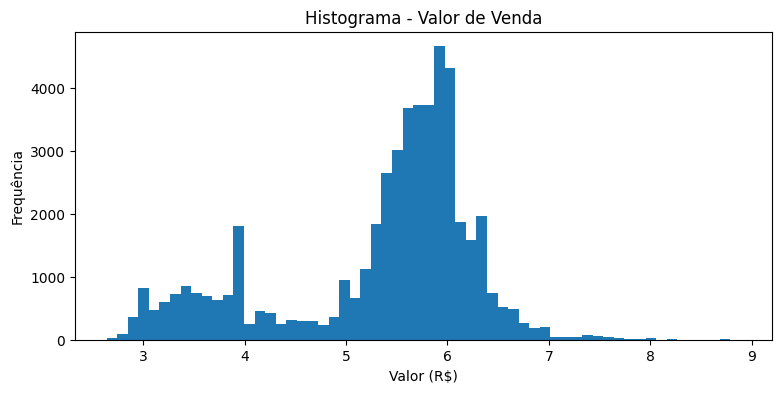

/tmp/ipython-input-1165045793.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=common, vert=True)


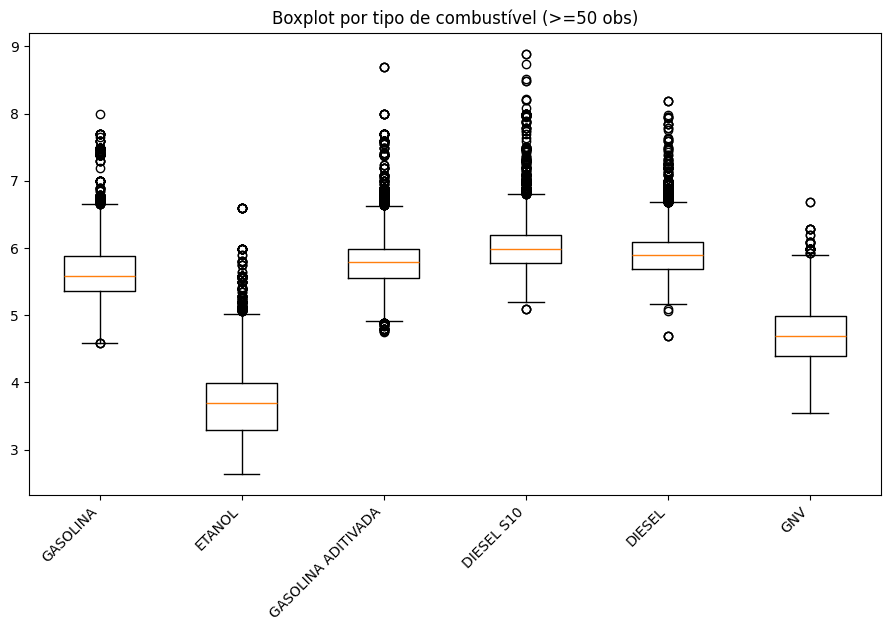

In [7]:
#Parte C — Distribuição dos preços (Histograma e Boxplot)

import matplotlib.pyplot as plt

# Histograma geral
plt.figure(figsize=(9,4))
plt.hist(df[price_col].dropna(), bins=60)
plt.title("Histograma - Valor de Venda")
plt.xlabel("Valor (R$)")
plt.ylabel("Frequência")
plt.show()

# Boxplot por produto (apenas produtos com >=50 observações para legibilidade)
counts = df[fuel_col].value_counts()
common = counts[counts >= 50].index.tolist()
data = [df.loc[df[fuel_col]==p, price_col].dropna() for p in common]
plt.figure(figsize=(11,6))
plt.boxplot(data, labels=common, vert=True)
plt.title("Boxplot por tipo de combustível (>=50 obs)")
plt.xticks(rotation=45, ha='right')
plt.show()


            Bandeira  count      mean       std   min   max
9            EQUADOR    127  6.459370  0.730224  4.59  8.89
34  SUL COMBUSTÍVEIS     10  6.237000  0.176261  6.05  6.44
6            DIBRAPE     12  6.050000  0.181509  5.87  6.27
1            ATEM' S    211  6.044360  1.020183  3.87  8.21
25       RDP ENERGIA      1  5.820000       NaN  5.82  5.82
26           REJAILE      2  5.820000  0.000000  5.82  5.82
30             SABBÁ    593  5.740944  0.774508  3.69  7.28
13             IDAZA     28  5.681429  0.708816  2.99  6.29
41       WALENDOWSKY     15  5.672000  0.726441  4.29  6.20
32                SP    141  5.622128  0.619488  3.99  6.48
4            CHARRUA    170  5.610824  0.493856  3.99  6.34
17            MAXSUL     45  5.600889  0.459846  4.09  6.36
24       RAIZEN MIME    167  5.599102  0.693110  3.88  6.82
22         POTENCIAL     78  5.580641  0.844312  3.77  6.79
28            RODOIL    201  5.566517  0.724052  2.99  6.39
2          ATLÂNTICA     56  5.490536  0

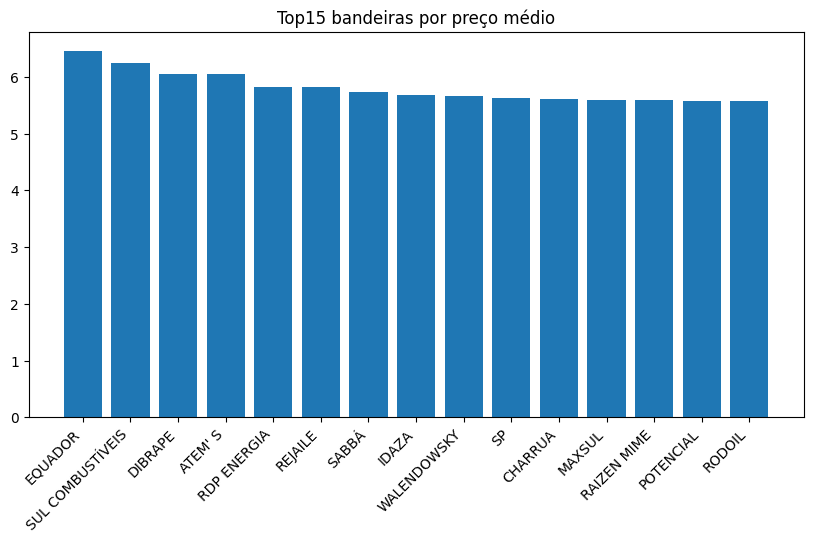

In [8]:
#Parte D — Comparar preços médios entre bandeiras (bandeira/rede)

bandeira_col = 'Bandeira'
mean_by_bandeira = df.groupby(bandeira_col)[price_col].agg(['count','mean','std','min','max']).reset_index()
mean_by_bandeira = mean_by_bandeira.sort_values('mean', ascending=False)
print(mean_by_bandeira.head(20))
# gráfico top 15 médios
top15 = mean_by_bandeira.head(15)
plt.figure(figsize=(10,5))
plt.bar(top15[bandeira_col], top15['mean'])
plt.xticks(rotation=45, ha='right')
plt.title("Top15 bandeiras por preço médio")
plt.show()


In [9]:
#Remoção de duplicatas e relatório

orig_count = len(df)
dup_count = df.duplicated().sum()
df_clean = df.drop_duplicates().copy()
removed = orig_count - len(df_clean)
print("orig:", orig_count, "duplicados:", dup_count, "removidos:", removed)


orig: 49998 duplicados: 0 removidos: 0


In [10]:
#Filtrando gasolina em Arapiraca — faixa de preço

muni_col = 'Municipio'
# normalizar texto
df_clean[muni_col] = df_clean[muni_col].astype(str).str.strip().str.title()
df_clean[fuel_col] = df_clean[fuel_col].astype(str).str.upper()

mask_gas = df_clean[fuel_col].str.contains('GASOLIN', na=False)
mask_arap = df_clean[muni_col].str.lower() == 'arapiraca'
gas_arap = df_clean[mask_gas & mask_arap]
print("n registros:", len(gas_arap))
print("min:", gas_arap[price_col].min(), "max:", gas_arap[price_col].max())
print(gas_arap[price_col].describe())


n registros: 77
min: 5.35 max: 6.69
count    77.00000
mean      5.61013
std       0.29118
min       5.35000
25%       5.48000
50%       5.49000
75%       5.68000
max       6.69000
Name: Valor de Venda, dtype: float64


In [11]:
#Variabilidade por bandeira (gasolina) e detecção de outliers por bandeira

gas = df_clean[mask_gas & df_clean[price_col].notna()]
std_by_bandeira = gas.groupby(bandeira_col)[price_col].std().dropna().sort_values(ascending=False)
print("Top por desvio (std):")
print(std_by_bandeira.head(10))

# IQR / outliers por bandeira (1.5*IQR)
outlier_summary = []
for b, grp in gas.groupby(bandeira_col):
    prices = grp[price_col].dropna()
    if len(prices) < 5:
        continue
    q1 = prices.quantile(0.25)
    q3 = prices.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = prices[(prices < lower) | (prices > upper)]
    outlier_summary.append({
        'bandeira': b, 'n_obs': len(prices), 'iqr': iqr, 'std': prices.std(),
        'n_outliers': len(outliers), 'pct_outliers': 100*len(outliers)/len(prices)
    })
outliers_df = pd.DataFrame(outlier_summary).sort_values('n_outliers', ascending=False)
print(outliers_df.head(15))


Top por desvio (std):
Bandeira
ATEM' S       0.722062
TAURUS        0.510147
SABBÁ         0.493867
DISLUB        0.479039
EQUADOR       0.468621
VIBRA         0.427097
BRANCA        0.395312
IPIRANGA      0.386296
ATLÂNTICA     0.375489
PETROBAHIA    0.364980
Name: Valor de Venda, dtype: float64
                bandeira  n_obs     iqr       std  n_outliers  pct_outliers
13              IPIRANGA   5077  0.4300  0.386296         164      3.230254
35                 VIBRA   5082  0.5000  0.427097         137      2.695789
3                 BRANCA   7190  0.5200  0.395312          97      1.349096
21                RAIZEN   3524  0.5000  0.351657          19      0.539160
28                    SP     67  0.1000  0.319414          18     26.865672
24                RODOIL    104  0.3700  0.286768           7      6.730769
31                TAURUS     49  0.5100  0.510147           6     12.244898
2              ATLÂNTICA     33  0.2200  0.375489           6     18.181818
22           RAIZE

In [12]:
#Média por CNPJ (top)

cnpj_col = 'CNPJ da Revenda'
df_clean[cnpj_col] = df_clean[cnpj_col].astype(str).str.replace('[^0-9]','', regex=True)
mean_by_cnpj = df_clean.groupby(cnpj_col)[price_col].mean().dropna().sort_values(ascending=False)
print(mean_by_cnpj.head(20))


CNPJ da Revenda
01777592000115    7.840000
02361352000106    7.775000
10406630000114    7.755833
05657534000370    7.740000
05657534000109    7.740000
84455633000346    7.723333
00603128000140    7.715000
10562906000153    7.705000
10627465000120    7.700000
02221812000273    7.690000
84455633000265    7.690000
02019936000190    7.690000
21760021000185    7.680000
02297445000100    7.656667
03608766000656    7.650000
07168478000255    7.585714
12975673000146    7.430000
09576343000173    7.430000
09368602000251    7.413333
07498919000520    7.413333
Name: Valor de Venda, dtype: float64


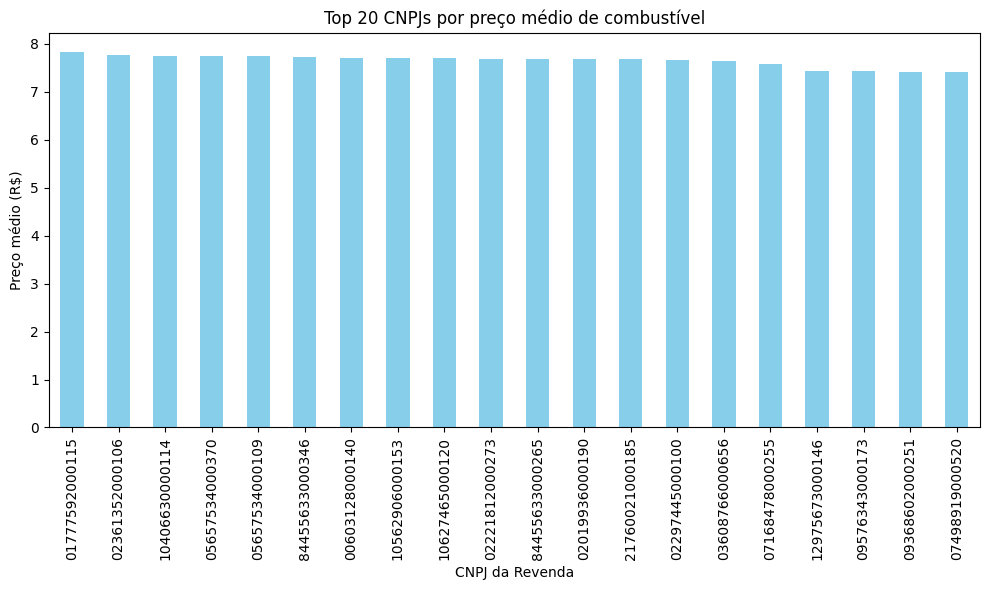

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Removendo duplicatas
df_clean = df.drop_duplicates().copy()

# Definindo colunas
cnpj_col = 'CNPJ da Revenda'
price_col = 'Valor de Venda'

# Limpando CNPJs para conter apenas números
df_clean[cnpj_col] = df_clean[cnpj_col].astype(str).str.replace('[^0-9]', '', regex=True)

# Calculando a média por CNPJ
mean_by_cnpj = df_clean.groupby(cnpj_col)[price_col].mean().dropna().sort_values(ascending=False)

# Selecionando o Top 20
top20 = mean_by_cnpj.head(20)

# Plotando gráfico
plt.figure(figsize=(10,6))
top20.plot(kind='bar', color='skyblue')
plt.title("Top 20 CNPJs por preço médio de combustível")
plt.ylabel("Preço médio (R$)")
plt.xlabel("CNPJ da Revenda")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [19]:
%pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.5 MB/s eta 0:00:00


In [26]:
from IPython.display import Markdown as md

md("""
# Análise de Preços de Combustíveis — Resultados

## 1. Registros duplicados
- Não foram encontrados registros duplicados no dataset.
- **Duplicatas detectadas:** 0 - **Removidas:** 0

## 2. Faixa de preço da gasolina em Arapiraca
- **Valor mínimo:** R$ 5,3500
- **Valor máximo:** R$ 6,6900
- **Número de registros:** 77

## 3. Bandeira com maior variabilidade de preços
- **ATEM\' S** apresentou o maior desvio padrão ≈ 0,7221, indicando maior dispersão de preços.

## 4. Outliers
- Foram identificados outliers claros nos boxplots.
- **Bandeiras com maior quantidade de outliers:**
  - IPIRANGA: 164
  - VIBRA: 137
  - BRANCA: 97
- Estes valores indicam preços muito acima ou abaixo da média para essas bandeiras.
- O maior desvio padrão também foi observado em **ATEM\' S**.

## 5. CNPJ com maior valor médio de venda de combustível
- **01777592000115** — média ≈ R$ 7,84
- Outros CNPJs no topo:
  - 02361352000106 — média ≈ R$ 7,775
  - 10406630000114 — média ≈ R$ 7,756

## 6. Checklist de resultados de aprendizagem
- ✅ Dataset carregado e verificado
- ✅ Duplicatas e valores ausentes tratados (observação: o campo Valor de Compra estava completamente vazio)
- ✅ Medidas estatísticas calculadas por combustível
- ✅ Histogramas e boxplots gerados para análise de distribuição
- ✅ Detecção de outliers por bandeira aplicada
- ✅ Comparação de CNPJs por média de preço concluída
""")



# Análise de Preços de Combustíveis — Resultados

## 1. Registros duplicados
- Não foram encontrados registros duplicados no dataset.  
- **Duplicatas detectadas:** 0 - **Removidas:** 0

## 2. Faixa de preço da gasolina em Arapiraca
- **Valor mínimo:** R$ 5,3500  
- **Valor máximo:** R$ 6,6900  
- **Número de registros:** 77

## 3. Bandeira com maior variabilidade de preços
- **ATEM' S** apresentou o maior desvio padrão ≈ 0,7221, indicando maior dispersão de preços.

## 4. Outliers
- Foram identificados outliers claros nos boxplots.  
- **Bandeiras com maior quantidade de outliers:**  
  - IPIRANGA: 164  
  - VIBRA: 137  
  - BRANCA: 97  
- Estes valores indicam preços muito acima ou abaixo da média para essas bandeiras.  
- O maior desvio padrão também foi observado em **ATEM' S**.

## 5. CNPJ com maior valor médio de venda de combustível
- **01777592000115** — média ≈ R$ 7,84  
- Outros CNPJs no topo:  
  - 02361352000106 — média ≈ R$ 7,775  
  - 10406630000114 — média ≈ R$ 7,756

## 6. Checklist de resultados de aprendizagem
- ✅ Dataset carregado e verificado  
- ✅ Duplicatas e valores ausentes tratados (observação: o campo Valor de Compra estava completamente vazio)  
- ✅ Medidas estatísticas calculadas por combustível  
- ✅ Histogramas e boxplots gerados para análise de distribuição  
- ✅ Detecção de outliers por bandeira aplicada  
- ✅ Comparação de CNPJs por média de preço concluída
